In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier#importing ML classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and displaying dataset values
dataset = pd.read_csv("Dataset/traffic_data.csv")
dataset

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,x,y,direction,congestion
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,0,0,EB,70
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,0,0,NB,49
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,0,0,SB,24
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,0,1,EB,18
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,0,1,NB,60
...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,1,3,NB,58
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,1,3,NE,50
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,1,3,SB,63
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1,3,SW,34


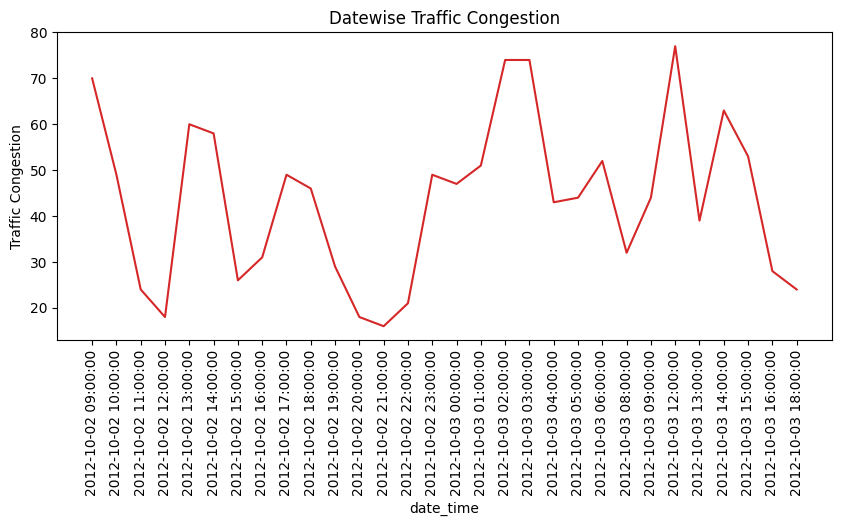

In [3]:
#plotting graph of traffic flow in different dates
#dataset['time'] = pd.to_datetime(dataset['time'], infer_datetime_format=True)
plt.figure(figsize=(10,4), dpi=100)
plt.plot(dataset.date_time[0:30], dataset.congestion[0:30], color='tab:red')
plt.gca().set(title="Datewise Traffic Congestion", xlabel='date_time', ylabel="Traffic Congestion")
plt.xticks(rotation=90)
plt.show()

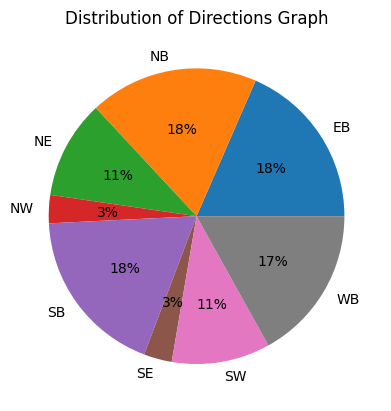

In [4]:
#graphs of different weather condition found in dataset
weather = dataset['direction'].ravel() #extracting weather data
labels, count = np.unique(weather, return_counts=True)
plt.pie(count, labels = labels, autopct='%.0f%%')
plt.title("Distribution of Directions Graph")
plt.show() 

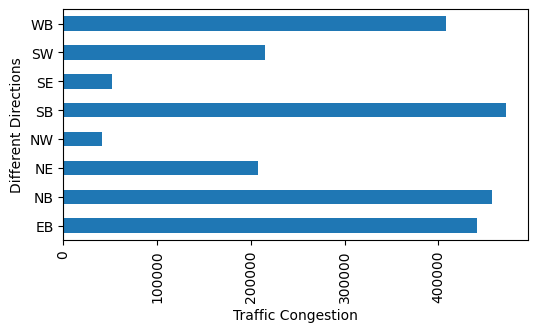

In [5]:
dataset.groupby(['direction'])['congestion'].sum().plot.barh(figsize=(6,3))
plt.xlabel('Traffic Congestion')
plt.ylabel("Different Directions")
plt.xticks(rotation=90)
plt.show()

In [6]:
#finding and displaying any missing or null values
dataset.isnull().sum()

temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
x                      0
y                      0
direction              0
congestion             0
dtype: int64

In [7]:
#now convert date column as numeric features by separting them into year, month, day, hour, second and minutes
dataset['date_time'] = pd.to_datetime(dataset['date_time'])
dataset['year'] = dataset['date_time'].dt.year
dataset['month'] = dataset['date_time'].dt.month
dataset['day'] = dataset['date_time'].dt.day
dataset['hour'] = dataset['date_time'].dt.hour
dataset['minute'] = dataset['date_time'].dt.minute
dataset['second'] = dataset['date_time'].dt.second
dataset

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,x,y,direction,congestion,year,month,day,hour,minute,second
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,0,0,EB,70,2012,10,2,9,0,0
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,0,0,NB,49,2012,10,2,10,0,0
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,0,0,SB,24,2012,10,2,11,0,0
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,0,1,EB,18,2012,10,2,12,0,0
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,0,1,NB,60,2012,10,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,1,3,NB,58,2018,9,30,19,0,0
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,1,3,NE,50,2018,9,30,20,0,0
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,1,3,SB,63,2018,9,30,21,0,0
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1,3,SW,34,2018,9,30,22,0,0


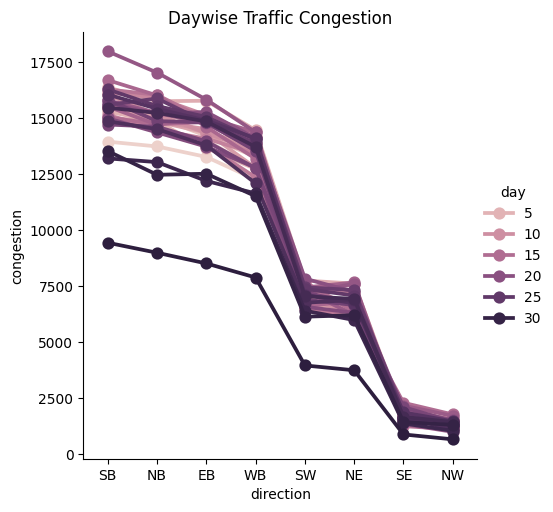

In [8]:
#channels which recive highest comments
data = dataset.groupby(['direction', 'day'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='day', data=data, kind='point')
plt.title("Daywise Traffic Congestion")
plt.show()

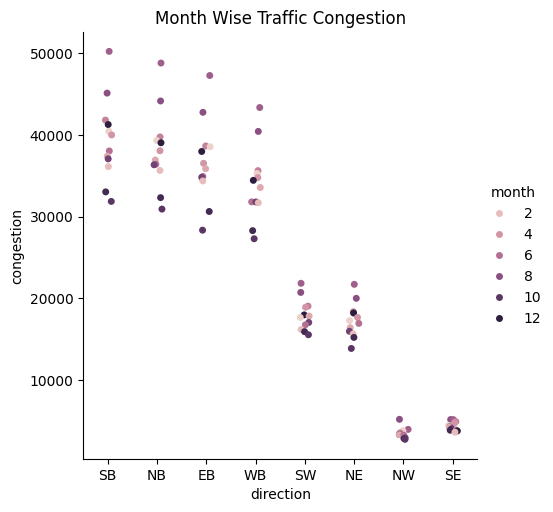

In [9]:
data = dataset.groupby(['direction', 'month'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='month', data=data)
plt.title("Month Wise Traffic Congestion")
plt.show()